# Lab Assignment 1



### Liu Rongxing, s1810054

## Task 1

Use `SymPy` to solve the differential equation $y' = -y^2\sin(x)$, with $y(0)=1$, and plot the solution.

In [2]:
import sympy as sym
sym.init_printing()
from IPython.display import display_latex
import sympy.plotting as sym_plot
from sympy import sin

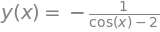

In [15]:
# Define the equation
x = sym.symbols('x')
y = sym.Function('y')
eq1 = sym.Eq(y(x).diff(x), -y(x)*y(x)*sin(x))

# Solve the equation
eq1sol0 = sym.dsolve(eq1, y(x), ics={y(0):1})
eq1sol0

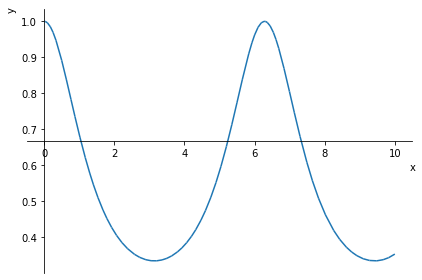

In [20]:
sym_plot.plot(eq1sol0.rhs, (x,0,10), xlabel = 'x', ylabel = 'y')

## Task 2

Use `SciPy`'s `odeint` function to solve the system of equations

$$ \begin{align*}\frac{dx}{dt} &= y \\ \frac{dy}{dt}&=x-x^3\end{align*} $$

Produce a plot of the solutions for $0\leq t\leq 10$ with initial conditions $x(0)=0$ and $y(0)\in\{0, 0.5, 1, \ldots, 3\}$.

How many curves do you expect to see plotted? How many do you actually see, and why is this?

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

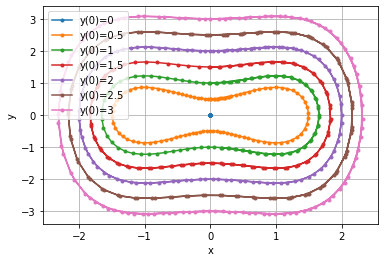

In [18]:
#form the system of equations
def dX_dt(X, t):
    x, y = X
    return [y, x-x**3]

#initial values of y
y0=[0,0.5,1,1.5,2,2.5,3]

t = np.linspace(0, 10, 100)

#iterate through initial values of y, label each one
for i in range (7):
    X0=[0,y0[i]]
    Xsol = odeint(dX_dt, X0, t)
    plt.plot(Xsol[:, 0], Xsol[:, 1],label='y(0)='+str(y0[i]),marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

As there are seven 7 values of y, I expect to see 7 curves plotted. However, only six of them are plotted, with only a dot at (0,0) for initial condition [0,0]. This is because when trying to solve the system of equations, $\frac{dy}{dx}=\frac{\frac{dy}{dt}}{\frac{dx}{dt}}$, and when $y(0)=0\Rightarrow \frac{dx}{dt}=0$. Which means we will not get a solution for $\frac{dy}{dx}$ and we will not get an equation with $x$ and $y$, hence no curve for initial condition [0,0]. 